Now that I've compute the torsion, I can convert protein into a list of torsion angles. Really I want to recreate the ramachandran plot so I'll just plot each one as a point in a density/heatmap plot.

I'll use https://www.rcsb.org/structure/4MS3 for the structure I'll compute on. It is stored locally at [`4ms3.pdb`](./4ms3.pdb).

I simply want the information that has ATOM prefixed. So I'll just grab those rows and throw that information in a pandas data frame

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("dark_background")

In [73]:
import re

def read_pdb_atoms_lines(filename):
	with open(filename, "r") as f:
		d = f.read()
		atoms = re.findall(r"ATOM\s*\d.*", d) # regex to find ATOM with space after then digit, bit of a hack
		return atoms

read_pdb_atoms_lines("./4ms3.pdb")

['ATOM      1  N   ARG A  50     -58.511   8.223 -23.522  1.00 71.10           N  ',
 'ATOM      2  CA  ARG A  50     -57.205   8.591 -24.072  1.00 70.86           C  ',
 'ATOM      3  C   ARG A  50     -56.771   9.938 -23.501  1.00 74.70           C  ',
 'ATOM      4  O   ARG A  50     -57.044  10.995 -24.084  1.00 74.16           O  ',
 'ATOM      5  CB  ARG A  50     -57.236   8.625 -25.614  1.00 70.40           C  ',
 'ATOM      6  CG  ARG A  50     -56.044   7.971 -26.298  1.00 77.45           C  ',
 'ATOM      7  CD  ARG A  50     -55.941   8.302 -27.785  1.00 80.95           C  ',
 'ATOM      8  NE  ARG A  50     -55.002   7.421 -28.484  1.00 84.03           N  ',
 'ATOM      9  CZ  ARG A  50     -54.420   7.691 -29.651  1.00 93.72           C  ',
 'ATOM     10  NH1 ARG A  50     -54.672   8.834 -30.280  1.00 78.23           N  ',
 'ATOM     11  NH2 ARG A  50     -53.576   6.824 -30.194  1.00 78.49           N  ',
 'ATOM     12  N   ARG A  51     -56.124   9.892 -22.330  1.00 71

In [123]:
def atoms_to_df(atoms: list[str]):
    """Extract Atom Index, Atom, Residue Label, and 3D coordinates"""
    points = []
    idxs = []
    atom_label = []
    residue = []
    info = []
    for line in atoms:
        numbers = re.findall(r"\s+[\d|.|-]+", line)
        idx = int(numbers[0])
        x = float(numbers[2])
        y = float(numbers[3])
        z = float(numbers[4])
        idxs.append(idx)
        points.append([float(x), float(y), float(z)]) 

        strings = re.findall(r"[A-Z]+", line)
        atom_label.append(strings[-1])
        residue.append(strings[2])
        info.append(strings[1])

    return pd.DataFrame({"id": idxs, "point": points, "atom": atom_label, "residue": residue, "info": info})


atoms = read_pdb_atoms_lines("./4ms3.pdb")
df = atoms_to_df(atoms)
df

,id,point,atom,residue,info
0,1,"[-58.511, 8.223, -23.522]",N,ARG,N
1,2,"[-57.205, 8.591, -24.072]",C,ARG,CA
2,3,"[-56.771, 9.938, -23.501]",C,ARG,C
3,4,"[-57.044, 10.995, -24.084]",O,ARG,O
4,5,"[-57.236, 8.625, -25.614]",C,ARG,CB
...,...,...,...,...,...
6414,6416,"[20.233, 34.309, -18.58]",O,ASP,O
6415,6417,"[18.648, 36.013, -20.356]",C,ASP,CB
6416,6418,"[17.609, 36.12, -21.437]",C,ASP,CG
6417,6419,"[16.563, 35.5, -21.297]",O,ASP,OD


Just to check that we have something, plot the chain as a curve

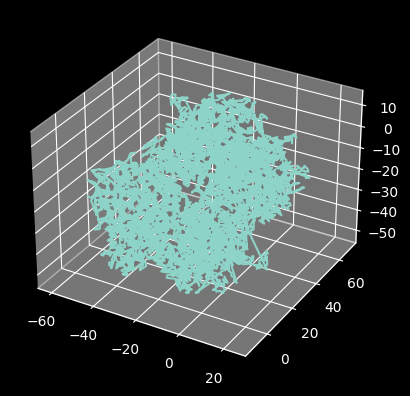

In [135]:
ax = plt.figure().add_subplot(projection='3d')
d = np.vstack(df["point"].array)
ax.plot(d[:, 0], d[:, 1], d[:, 2])

Great works and looks close to https://www.rcsb.org/structure/4MS3